In [3]:
#RK4

In [1]:
from math import sin, cos, log, pi
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
#on importe ce qu'il faut pour les animations
from matplotlib import animation
from IPython.display import HTML

In [3]:
def RK4_step (u,f,dt):
    k1 = f(u)
    k2 = f(u + 1/2*dt*k1)
    k3 = f(u + 1/2*dt*k2)
    k4 = f(u + dt*k3)
    K = k1+2*k2+2*k3+k4
    return u + 1/6*dt*K

In [4]:
G = 6.67408*10**(-11)
Mterre = 5.972*10**24
Mlune = 7.348*10**22

In [5]:
def f(u):
    x = u[0]
    y = u[1]
    vx = u[2]
    vy = u[3]
    return numpy.array([vx,vy,-G*Mterre*x/(x**2+y**2)**(3/2),-G*Mterre*y/(x**2+y**2)**(3/2)])

In [6]:
T = 2450000.0
dt = 1
N = int(T/dt)+1
x0 = -362600000.0
y0 = 0.0
vx0 = 0.0
vy0 = 1083.434974
u_rk4   = numpy.empty((N, 4))
u_rk4[0]   = numpy.array([x0, y0, vx0, vy0])  
for n in range(N-1):
    u_rk4[n+1]   = RK4_step(u_rk4[n], f, dt)

In [54]:
#nsm

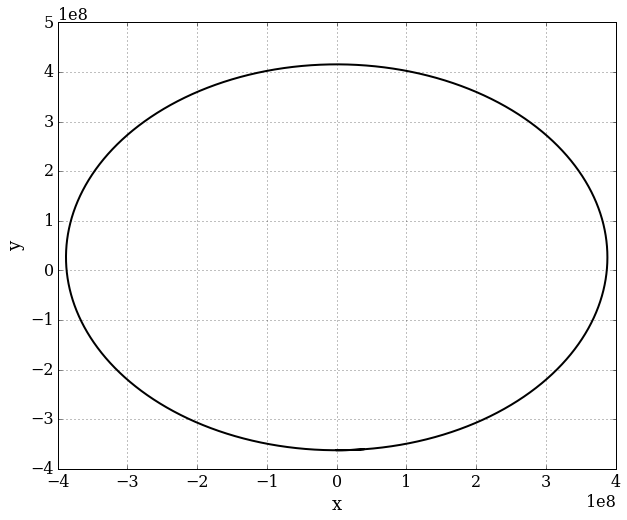

In [47]:
x = u_rk4[:,0]
y = u_rk4[:,1]
pyplot.figure(figsize=(10,8))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.plot(y,x, 'k-', lw=2);

In [48]:
xmax = max(u_rk4[:,0])
ymax = max(u_rk4[:,1])
ymin = min(u_rk4[:,1])
print (xmax)
print (ymin)
print (ymax)

415411089.288
-388108310.882
388108310.882


In [49]:
#demi petit axe b
b = (ymax - ymin)/2
print (b)

388108310.882


In [50]:
#demi grand axe a
a = (xmax - x0)/2
print (a)

389005544.644


In [51]:
#excentricité
e = (1-(b/a)**(2))**(1/2)
print (e)

0.0678796099606


In [12]:
xmin = min(u_rk4[:,0])
print (xmin)

-362600000.0


In [52]:
#calcul de la période T
for i in range(N):
    if u_rk4[i][0] < 0 and u_rk4 [i][1] < 0 :
        T = i
         
print (T)

2414670


In [53]:
T = 2414670
r_rk4 = numpy.empty(T)
for n in range (T):
    r_rk4[n] = ((u_rk4[n][0])**2 + (u_rk4[n][1])**2)**(1/2)

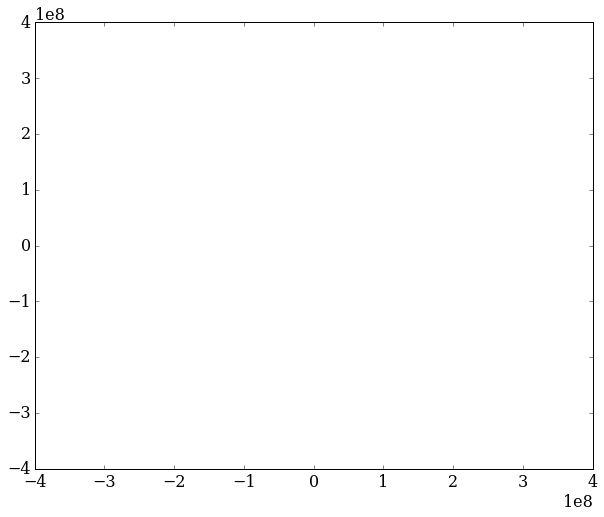

In [10]:
fig = pyplot.figure(figsize=(10,8))
ax = pyplot.axes(xlim=(-4*10**8,4*10**8), ylim=(-4*10**8,4*10**8))
line = ax.plot([], [], color='#003366', ls='--', lw=3)[0]

In [54]:
T = int(2414670)
M = 200
def animate(i):
    line.set_data(u_rk4[:i*M,0],u_rk4[:i*M,1])
    for j in range(T):
        u_rk4[j+1]   = RK4_step(u_rk4[j], f, dt)
        u_rk4[:i*M+1,0] = u_rk4[j+1][0]
        u_rk4[:i*M+1,1] = u_rk4[j+1][1]

In [55]:
anim = animation.FuncAnimation(fig, animate, frames=int(T/M), interval=M)

In [ ]:
HTML(anim.to_html5_video())

In [19]:
print (pi)
print (T)

3.141592653589793
2414670


In [15]:
#convergence de notre solution
epsilon = 0.0549006
rmin = 362600000
théta0 = 0
dthéta = 2*pi/T
r_exact = numpy.empty(T)
for n in range (T-1) :
    r_exact [n] = rmin*(1+epsilon)/1+epsilon*cos(dthéta*n)
    

In [44]:
r_rk4 = numpy.empty(T)
for n in range (T-1):
    r_rk4[n] = ((u_rk4[n][0])**2 + (u_rk4[n][1])**2)**(1/2)

IndexError: index 24147 is out of bounds for axis 0 with size 24147

In [25]:
def get_diffgrid(u_current, u_fine, dt):
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
   
    grid_size_ratio = int(numpy.ceil(N_fine/N_current))
    
    diffgrid = dt * numpy.sum( numpy.abs(\
            u_current[:,2]- u_fine[::grid_size_ratio,2])) 
    
    return diffgrid

In [32]:
T = 2414670
dt_values = numpy.array([10000, 1000, 100])

u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    N = int(T/dt)+1   
    
    t = numpy.linspace(0.0, T, N)
    
    u_rk4 = numpy.empty((N, 4))
    u_rk4[0] = numpy.array([x0, y0, vx0, vy0])

    for n in range(N-1):
        u_rk4[n+1] = RK4_step(u_rk4[n], f, dt)
    
    u_values[i] = u_rk4
    
diffgrid = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):

    diffgrid[i] = get_diffgrid(u_values[i], u_values[-1], dt) 

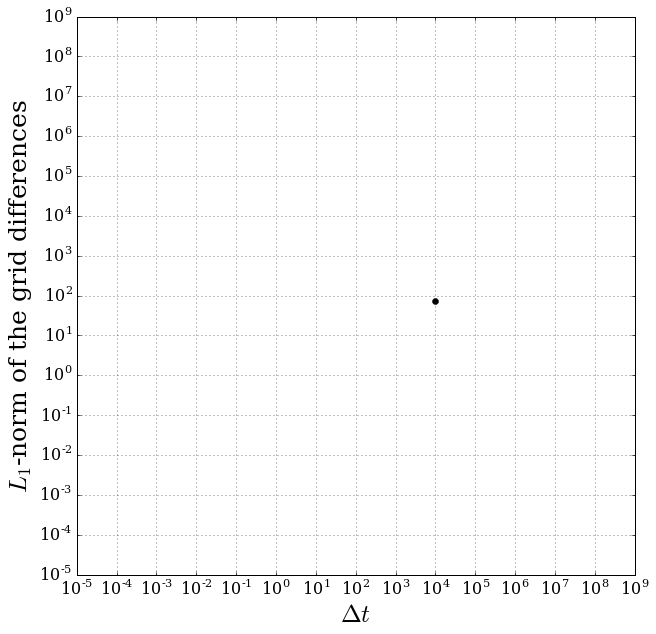

In [56]:
pyplot.figure(figsize=(10,10))
pyplot.grid(True)
pyplot.xlabel(r'$\Delta t$', fontsize=25)
pyplot.ylabel(r'$L_1$-norm of the grid differences', fontsize=25)
pyplot.xlim(1e-5,1e9)
pyplot.ylim(1e-5,1e9)
pyplot.loglog(dt_values, diffgrid, color='k', ls='--', lw=2, marker='o');

In [28]:
T = 2414670
r = 4
dt = 1000

dt_values = numpy.array([dt, r*dt, r**2*dt])

u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    N = int(T/dt)+1   
    
    t = numpy.linspace(0.0, T, N)
    
    u_rk4 = numpy.empty((N, 4))
    u_rk4[0] = numpy.array([x0, y0, vx0, vy0])

    for n in range(N-1):
        u_rk4[n+1] = RK4_step(u_rk4[n], f, dt)
    
    u_values[i] = u_rk4
    
alpha = (log(get_diffgrid(u_values[2], u_values[1], dt_values[2])) 
         - log(get_diffgrid(u_values[1], u_values[0], dt_values[1]))) / log(r)

print(alpha)

4.072316920349579


In [20]:
T = 2414670
r = 4
dt = 10000

dt_values = numpy.array([dt, r*dt, r**2*dt])

u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    N = int(T/dt)+1   
    
    t = numpy.linspace(0.0, T, N)
    
    u_rk4 = numpy.empty((N, 4))
    u_rk4[0] = numpy.array([x0, y0, vx0, vy0])

    for n in range(N-1):
        u_rk4[n+1] = RK4_step(u_rk4[n], f, dt)
    
    u_values[i] = u_rk4
    
Beta = (log(get_diffgrid(u_values[2], u_values[1], dt_values[2])) 
         - log(get_diffgrid(u_values[1], u_values[0], dt_values[1]))) / log(r)

print(Beta)

4.521010819076845


In [21]:
T = 2414670
r = 4
dt = 100

dt_values = numpy.array([dt, r*dt, r**2*dt])

u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    N = int(T/dt)+1   
    
    t = numpy.linspace(0.0, T, N)
    
    u_rk4 = numpy.empty((N, 4))
    u_rk4[0] = numpy.array([x0, y0, vx0, vy0])

    for n in range(N-1):
        u_rk4[n+1] = RK4_step(u_rk4[n], f, dt)
    
    u_values[i] = u_rk4
    
Gamma = (log(get_diffgrid(u_values[2], u_values[1], dt_values[2])) 
         - log(get_diffgrid(u_values[1], u_values[0], dt_values[1]))) / log(r)

print(Gamma)

3.6558953033942196


In [22]:
T = 2414670
r = 4
dt = 1

dt_values = numpy.array([dt, r*dt, r**2*dt])

u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    N = int(T/dt)+1   
    
    t = numpy.linspace(0.0, T, N)
    
    u_rk4 = numpy.empty((N, 4))
    u_rk4[0] = numpy.array([x0, y0, vx0, vy0])

    for n in range(N-1):
        u_rk4[n+1] = RK4_step(u_rk4[n], f, dt)
    
    u_values[i] = u_rk4
    
Delta = (log(get_diffgrid(u_values[2], u_values[1], dt_values[2])) 
         - log(get_diffgrid(u_values[1], u_values[0], dt_values[1]))) / log(r)

print(Delta)

KeyboardInterrupt: 

In [7]:
G = 6.67408*10**(-11)
Mterre = 5.972*10**24
Mlune = 7.348*10**22
a=388976774.675
xL=a
yL=0

In [19]:
#Astéroïde 
def f_ast(u2):

    x = u2[0]
    y = u2[1]
    vx = u2[2]
    vy = u2[3]
    return numpy.array([vx,vy,G*x*(Mlune/((x-xL)**2+(y-yL)**2)**(3/2)-Mterre/(x**2+y**2)**(3/2)),G*y*(Mlune/((x-xL)**2+(y-yL)**2)**(3/2)-Mterre/(x**2+y**2)**(3/2))])

In [20]:
def f(u):
    x = u[0]
    y = u[1]
    vx = u[2]
    vy = u[3]
    return numpy.array([vx,vy,-G*Mterre*x/(x**2+y**2)**(3/2),-G*Mterre*y/(x**2+y**2)**(3/2)])

In [23]:
vy0= u_rk4[int(2414403/2)][3]            #vitesse de la lune a l'apogée
                                    #(on peut diviser la période par deux, grâce à la loi de kepler)
print (vy0)

-383.180755568


In [22]:
T = 1209600   #14 jours
dt = 1
N = int(T/dt)+1
x0 = 415353549.349     #xmax        ce sont les données pour calculer la position de la lune
y0 = 0.0
vx0 = 0.0 
xa0=xmax-a            #position de départ de l'astéroïde

u_rk4   = numpy.empty((N, 4))
u_rk4[0]   = numpy.array([x0, y0, vx0, vy0])
a_rk4 = numpy.empty((N,4))       #liste de donnée de l'astéroïde
a_rk4[0]= numpy.array([xa0,0,-500,500])

for n in range(N-1):
    u_rk4[n+1]   = RK4_step(u_rk4[n], f, dt)
    
    xL=u_rk4[n+1][0]              #donnée pour calculer la position de l'astéroïde
    yL=u_rk4[n+1][1]
    
    a_rk4[n+1] = RK4_step(a_rk4[n],f_ast,dt)
    
print (a_rk4[N-1][0],a_rk4[N-1][1])

8449501.16928 2083787.95927


la position en x de l'astéroïde après 14 jours est à ~8500km à droite de la terre (cohérent)
et la position en y est de ~2000km en haut de la terre (cohérent)
x=8449501.16928
y=2083787.95927

In [ ]:
#outils pour animer nos trajectoire
anim = animation.FuncAnimation(fig, diffusion,
                               frames=nt, interval=100)